In [1]:
import numpy as np
from skimage import io

from corebreakout import CoreColumn

Using TensorFlow backend.


In [2]:
# Load some images
img1 = io.imread('../tests/data/column1.jpeg') 
img2 = io.imread('../tests/data/column2.jpeg')

img1.shape, img2.shape

((6070, 782, 3), (5917, 779, 3))

## Creating Columns

In [3]:
# You can pass `top` and `base`
col1 = CoreColumn(img1, top=1.0, base=2.0)
col2 = CoreColumn(img2, top=2.0, base=3.0)

print(col1, col2)

CoreColumn instance with:
	 img.shape: (6070, 782, 3)
	 (top, base): (1.000, 2.000)
	 add_tol & add_mode: 0.0003 , fill
 CoreColumn instance with:
	 img.shape: (5917, 779, 3)
	 (top, base): (2.000, 3.000)
	 add_tol & add_mode: 0.0003 , fill



In [4]:
# You can also pass `depths` array
d1 = np.linspace(1.0, 2.0, num=img1.shape[0])
d2 = np.linspace(2.0, 3.0, num=img2.shape[0])

col1 = CoreColumn(img1, depths=d1)
col2 = CoreColumn(img2, depths=d2)

print(col1, col2)

CoreColumn instance with:
	 img.shape: (6070, 782, 3)
	 (top, base): (1.000, 2.000)
	 add_tol & add_mode: 0.0003 , fill
 CoreColumn instance with:
	 img.shape: (5917, 779, 3)
	 (top, base): (2.000, 3.000)
	 add_tol & add_mode: 0.0003 , fill



## Adding Columns

In [5]:
print(col1 + col2)

(1.0, 2.0)  +  (2.0, 3.0)  gap:  0.0
CoreColumn instance with:
	 img.shape: (11987, 782, 3)
	 (top, base): (1.000, 3.000)
	 add_tol & add_mode: 0.0003 , fill



In [6]:
# Default `add_tol` will not allow gaps larger than approximate pixel size
col1 = CoreColumn(img1, top=1.0, base=2.0)
col2 = CoreColumn(img2, top=3.0, base=4.0)

print(col1 + col2)

(1.0, 2.0)  +  (3.0, 4.0)  gap:  1.0


UserWarning: Gap of 1.0 greater than `LHS.add_tol`: 0.0003295435821386583!

In [7]:
# We can specify a greater `add_tol` though

# The LHS of the `+` operator is the one that counts

col1 = CoreColumn(img1, top=1.0, base=2.0, add_tol=1.0)
col2 = CoreColumn(img2, top=3.0, base=4.0)

print(col1 + col2)

(1.0, 2.0)  +  (3.0, 4.0)  gap:  1.0
CoreColumn instance with:
	 img.shape: (17978, 782, 3)
	 (top, base): (1.000, 4.000)
	 add_tol & add_mode: 1.0000 , fill



# Plotting and `add_mode`

(1.0, 2.0)  +  (3.0, 4.0)  gap:  1.0


(<Figure size 720x2520 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50c689be50>)

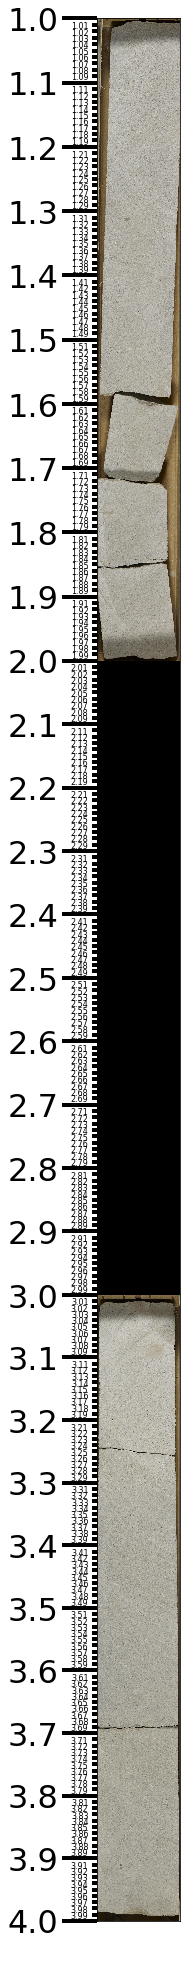

In [8]:
col1 = CoreColumn(img1, top=1.0, base=2.0, add_tol=1.0)
col2 = CoreColumn(img2, top=3.0, base=4.0)

# tick, major, and minor kwargs available
(col1 + col2).plot(figsize=(10, 35), minor_kwargs={'labelsize' : 8})

(1.0, 2.0)  +  (3.0, 4.0)  gap:  1.0


(<Figure size 720x1800 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50c63e8e90>)

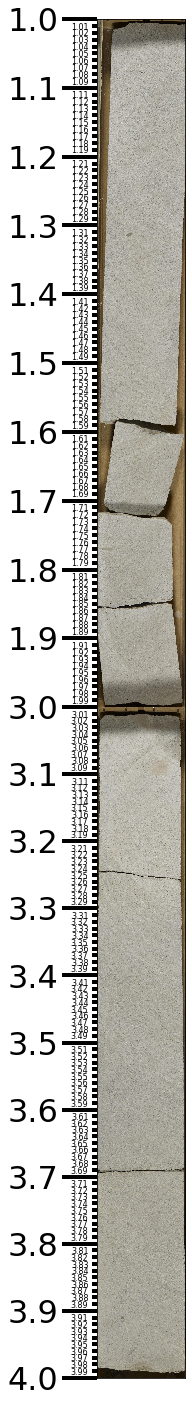

In [9]:
# If we don't want to 'fill' the gap between columns when adding,
# then we can specify add_mode='collapse' at construction time
# again, the __add__ operation just checks the LHS instance

col1 = CoreColumn(img1, top=1.0, base=2.0, add_tol=1.0, add_mode='collapse')
col2 = CoreColumn(img2, top=3.0, base=4.0)

# tick, major, and minor kwargs available
(col1 + col2).plot(figsize=(10, 25), minor_kwargs={'labelsize' : 8})

# Column slicing

(<Figure size 432x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50c6335490>)

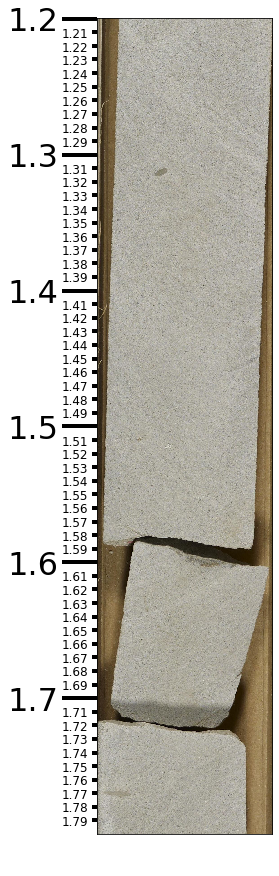

In [10]:
col1.slice_depth(top=1.2, base=1.8).plot(figsize=(6, 15))

# Iterating over chunks of Column data

In [11]:
cols = [CoreColumn(img, ds) for img, ds in col1.iter_chunks(3000, step_size=2200)]

len(cols)

3

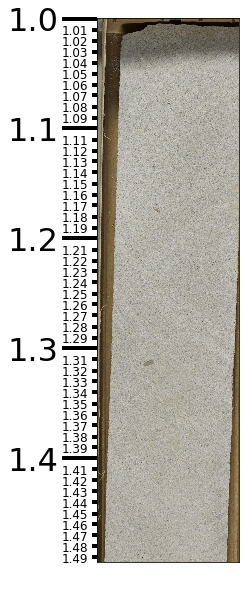

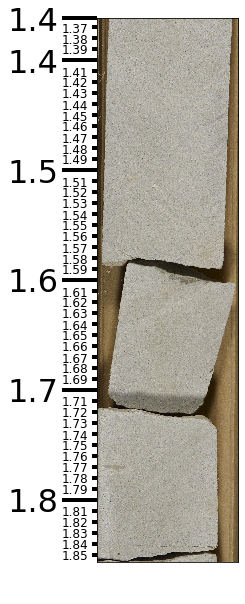

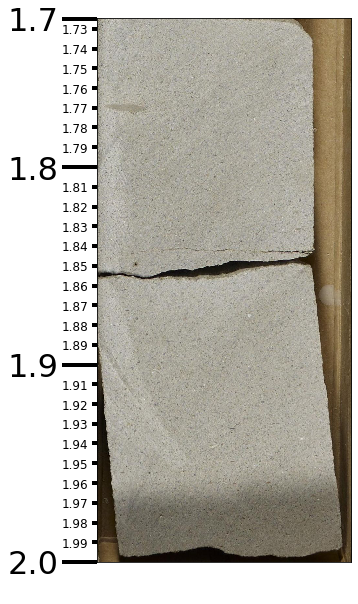

In [12]:
for col in cols:
    col.plot(figsize=(5, 10))

## Save/load reference

In [13]:
# CoreColumn.save(save(self, path, name=None, pickle=True, image=False, depths=False)

print(CoreColumn.save.__doc__)

Save the CoreColumn (or parts of it) to directory `path`.

        Parameters
        ----------
        path : str or Path
            Location to save to (must exist and be a directory).
        name : str, optional
            Stem to save files as, default=`CoreColumn_<top>_<base>`.
        pickle : bool, optional
            Whether to pickle the entire object with `dill`, default=True.
        image : bool, optional
            Whether to save the image as '.npy' file, default=False.
        depths : bool, optional
            Whether to save the depths as a '.npy' file, default=False
        


In [14]:
# @classmethod
# CoreColumn.load(cls, path, name, **kwargs):

print(CoreColumn.load.__doc__)

Load a CoreColumn instance from directory `path`.

        If '<name>.pkl' exists, will just load from that file.

        Otherwise, at least '<name>_image.npy' must exist. If '<name>_depths.npy'
        also exists, those will be read as `depths`. If not, the user must pass
        either `depths` or `top` & `base` as **kwargs.
        
